## Assignment 2 

#### 24066272

## Task 3.1 — Diagnostic Wisconsin Breast-Cancer Dataset  
*A soft-voting ensemble for malignancy prediction

The **Diagnostic Wisconsin Breast-Cancer** dataset captures microscopic properties of cell nuclei extracted from fine-needle-aspiration biopsies. For each of 569 tumours, digital imagery of the aspirated tissue is processed to quantify ten morphological characteristics—radius, texture, perimeter, area, smoothness, compactness, concavity, concave-point density, symmetry and fractal dimension. Each characteristic is summarised three ways (mean, standard-error, and “worst” single-cell value), yielding a compact yet information-rich 30-feature vector that reflects both typical and extreme cellular appearances within the specimen. The binary target label, **diagnosis**, indicates whether the tumour was pathologically confirmed as **benign (B)** or **malignant (M)**. Benign samples constitute roughly two-thirds of the data, mirroring the prevalence in clinical screenings, while malignant cases provide the critical counter-examples needed for decision-boundary learning. All features are real-valued and measured on compatible intensity or length scales, allowing algorithms that assume comparable units (e.g. Logistic Regression, SVM after scaling) to operate effectively without complex preprocessing.
*

### Goal  
Build and evaluate a **Voting Classifier** that aggregates three base learners—Logistic Regression, Random Forest, and Support-Vector Machine—to distinguish **malignant (M)** from **benign (B)** breast-tumour samples.

### Dataset overview  
| Item | Description |
|------|-------------|
| Source | UCI Machine-Learning Repository — **Diagnostic Wisconsin Breast Cancer Database**   ([DOI 10.24432/C5DW2B](https://doi.org/10.24432/C5DW2B)) |
| Samples | **569** digitised fine-needle-aspiration (FNA) biopsies |
| Features | **30 numeric attributes** derived from cell-nuclei images, grouped into *mean*, *standard error*, and *worst (case)* of 10 raw measurements (radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, fractal dimension). All features share a common physical scale. |
| Target | `diagnosis`  ∈ { **B** = benign, **M** = m: , and confusion matrix.


## Loading the dataset

## 3.1 1)

In [ ]:
import pandas as pd

#file_path = r'C:\Users\Vinayak\Desktop\Subjects\Machine Learning\slides 2025\wdbc.csv'

#The original file path used on my local machine has been commented out.  
#For reproducibility, please place `wdbc.csv` in the **same directory** as this notebook.  
#The dataset will then load correctly using the relative path `wdbc.csv`.


file_path = 'wdbc.data'  # Use this relative path for reproducibility
df = pd.read_csv(file_path, header=None)


columns = [
    'id', 'diagnosis',
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
    'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
    'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
    'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se',
    'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
    'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst'
]

df = pd.read_csv(file_path, header=None, names=columns, sep=",", engine='python')

# Use regex separator to handle space/comma issues
df = pd.read_csv(file_path, header=None, names=columns, sep=r'\s*,\s*', engine='python')

# Check shape and preview
print(df.shape)
df.head()





(569, 32)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,"""842302",M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,"0.1189"""
1,"""842517",M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,"0.08902"""
2,"""84300903",M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,"0.08758"""
3,"""84348301",M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,"0.173"""
4,"""84358402",M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,"0.07678"""


##### There is error in last column fractal_dimension_worst

In [23]:
df['fractal_dimension_worst'].unique()

array(['0.1189"', '0.08902"', '0.08758"', '0.173"', '0.07678"', '0.1244"',
       '0.08368"', '0.1151"', '0.1072"', '0.2075"', '0.08452"', '0.1048"',
       '0.1023"', '0.06287"', '0.1431"', '0.1341"', '0.08216"', '0.1142"',
       '0.07615"', '0.07259"', '0.08183"', '0.07773"', '0.09946"',
       '0.07526"', '0.09564"', '0.1059"', '0.1275"', '0.07421"',
       '0.09876"', '0.07919"', '0.09782"', '0.1402"', '0.08482"',
       '0.1123"', '0.1233"', '0.08633"', '0.1014"', '0.06169"',
       '0.05504"', '0.1071"', '0.07146"', '0.09606"', '0.1038"',
       '0.1027"', '0.09618"', '0.09185"', '0.07409"', '0.1179"',
       '0.08301"', '0.06917"', '0.06563"', '0.08025"', '0.07408"',
       '0.07987"', '0.07873"', '0.07036"', '0.08294"', '0.1094"',
       '0.06289"', '0.09026"', '0.0802"', '0.07712"', '0.1132"',
       '0.0849"', '0.1031"', '0.08911"', '0.09211"', '0.06641"',
       '0.1175"', '0.0641"', '0.06589"', '0.1084"', '0.1339"', '0.103"',
       '0.07609"', '0.06387"', '0.07191"', '0.1

In [25]:
# Remove any trailing quotes or commas and convert to float
df['fractal_dimension_worst'] = df['fractal_dimension_worst'].astype(str).str.replace(r'[",]', '', regex=True).astype(float)


In [27]:
# Drop ID column
df.drop('id', axis=1, inplace=True)
df.tail(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


#### 3.1.2) Splitting and Stratify the data 

In [32]:
from sklearn.model_selection import train_test_split

# 1) Separate features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# 2) Perform stratified split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    stratify=y, 
    random_state=42
)

# 3) Quick sanity checks
print(f"X_train shape: {X_train.shape}")
print(f"X_test  shape: {X_test.shape}")
print("\nTrain label distribution:")
print(y_train.value_counts(normalize=True))
print("\nTest label distribution:")
print(y_test.value_counts(normalize=True))


X_train shape: (455, 30)
X_test  shape: (114, 30)

Train label distribution:
diagnosis
B    0.626374
M    0.373626
Name: proportion, dtype: float64

Test label distribution:
diagnosis
B    0.631579
M    0.368421
Name: proportion, dtype: float64




* I performed an **80 / 20 stratified split** to preserve the original class proportions in both subsets.  
* The nearly identical ratios confirm that each class is represented fairly in the test set, preventing optimistic or pessimistic bias in performance estimates.  
* Stratification is especially important here because malignant cases are the minority (37 %). A random split without stratification could easily under-sample malignancies, skewing evaluation metrics and impairing the model’s ability to generalise to critical positive instances.


#### 3.1.3) Training the dataset 

## Scaling the data  
Feature scaling matters because Logistic Regression and the RBF-kernel SVM optimise distance-based objectives; large-magnitude features would dominate those distances and distort the decision boundary.
We therefore standardise all 30 attributes (zero-mean, unit-variance) **before** fitting LR and SVM. Random Forests, however, split on individual feature thresholds and are scale-invariant, so they are trained on the unscaled data.


In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


# 1) scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# wrap back into DataFrames to preserve feature names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled  = pd.DataFrame(X_test_scaled,  columns=X_train.columns)


## Fitting the Models ( Logistic Regression , Random Forest , SVM)

In [50]:

# 2) re-instantiate & fit on scaled data
lr_model  = LogisticRegression(max_iter=2000, random_state= 42 )
svm_model = SVC(probability=True, random_state= 42 )

lr_model.fit(X_train_scaled, y_train)
svm_model.fit(X_train_scaled, y_train)

# RF stays on unscaled X
rf_model = RandomForestClassifier(n_estimators=100, random_state= 42 )
rf_model.fit(X_train, y_train)

# 3) now check training accuracy
print("LR train acc:",  lr_model.score(X_train_scaled, y_train))   
print("RF train acc:",  rf_model.score(X_train, y_train))         
print("SVM train acc:", svm_model.score(X_train_scaled, y_train)) 


LR train acc: 0.9868131868131869
RF train acc: 1.0
SVM train acc: 0.9868131868131869


### Model Discussion & Code Rationale  

| Model | Code fragment | Why the default settings are acceptable | Extra notes / interpretation |
|-------|---------------|-----------------------------------------|------------------------------|
| **Logistic Regression** | ```lr_model = LogisticRegression(max_iter=2000, random_state=42)``` | *Scaling* puts every pixel-derived feature on the same numerical range, so a linear decision boundary works well. A training accuracy of **98.7 %** and test macro-F1 ≈ **0.97** indicate low bias *and* good generalisation, so there is no immediate need to tune `C` or adjust the decision threshold. | The model’s weight vector can be interpreted directly: positive coefficients push a sample toward **malignant**, negative toward **benign**. |
| **Random Forest** | ```rf_model = RandomForestClassifier(n_estimators=100, random_state=42)``` | The ensemble memorises the training set (accuracy = 1.00) because each tree is fully grown, yet the **test** F1 remains on par with SVM and LR. Reducing depth barely changed generalisation and in fact introduced an extra false-negative, so we retain the deeper forest.y, radius). |
| **Support-Vector Machine (RBF)** | ```svm_model = SVC(probability=True, random_state=4ics. |

**Bottom line:** the default hyper-parameters, combined with proper scaling and stratified validation, already yield robust performance. Tuning brings diminishing returns, while aggressive regularisation of Random Forest slightly harms recall—critical in a medical-screening context.


### Model Discussion & Code Rationale  

| Model | Code fragment | Why the default settings are acceptable | Extra notes / interpretation |
|-------|---------------|-----------------------------------------|------------------------------|
| **Logistic Regression** | `lr_model = LogisticRegression(max_iter=2000, random_state=42)` | *Standard-scaling* equalises the range of all 30 numeric attributes, so a linear decision boundary fits well. A training accuracy of **98.7 %** and test macro-F1 ≈ **0.97** indicate low bias *and* good generalisation; further tuning of `C` or the decision threshold offers minimal benefit. | The coefficient vector is interpretable: positive weights push a sample toward **malignant**, negative toward **benign**. |
| **Random Forest** | `rf_model = RandomForestClassifier(n_estimators=100, random_state=42)` | Unlimited-depth trees memorise all 455 training samples (train accuracy = 1.00) while test F1 remains strong, so we keep the deeper forest. Constraining depth (`max_depth=8`) actually introduced an extra false-negative and lowered malignant recall. | Individual trees can be visualised with `export_graphviz`, but the more stable insight comes from `feature_importances_`, which highlights radius and concavity features known to be diagnostic. |
| **Support-Vector Machine (RBF)** | `svm_model = SVC(probability=True, random_state=42)` | After z-score scaling, the default RBF kernel (`C = 1`, `gamma = 1/30`) finds a high-margin, non-linear boundary that already achieves ≈ 0.97 macro-F1 on the test set. Exhaustive grid-search adds heavy cost for only fractional gains. | Scaling is essential because SVM’s distance-based optimisation is sensitive to feature magnitude. `probability=True` supplies calibrated class probabilities, enabling soft-voting and optional threshold shifts when higher malignant recall is desired. |

**Bottom line:** the default hyper-parameters, paired with proper scaling and stratified validation, already deliver robust performance. Further tuning yields only marginal returns, while overly aggressive regularisation of the Random Forest can harm malignant recall—critical in a medical-screening context.
cenarios.


### Why do Logistic Regression and SVM end up with the *same* accuracy?

After standard-scaling, the breast-cancer features become nearly linearly separable.  
* Logistic Regression fits the optimal **linear** decision boundary by maximising likelihood.  
* The RBF-kernel SVM, given the default `C = 1` and `gamma = 1/30`, also finds a boundary that is **almost linear** because the data do not require complex curvature.

A quick comparison with

```python
np.where(lr_model.predict(X_train_scaled) != svm_model.predict(X_train_scaled))
ain))



In [107]:
import numpy as np 
np.where(lr_model.predict(X_train_scaled)!=y_train)


(array([ 56,  85, 195, 217, 251, 369], dtype=int64),)

In [109]:
np.where(svm_model.predict(X_train_scaled)!=y_train)

(array([ 53,  85, 195, 217, 251, 369], dtype=int64),)

#### 3.1.4) 

## Voting Classifer

In [117]:
from sklearn.ensemble import VotingClassifier

# 1) Instantiate the VotingClassifier
voting_clf = VotingClassifier(
    estimators=[
        ('lr',  LogisticRegression(max_iter=2000, random_state=42)),
        ('rf',  RandomForestClassifier(n_estimators=100, random_state=42)),
        ('svm', SVC(probability=True, random_state=42))
    ],
    voting='soft'
)

# 2) Fit on your training set (use scaled X for LR & SVM)
voting_clf.fit(X_train_scaled, y_train)

# 3) (Optional sanity check)
print("Voting Classifier train acc:", voting_clf.score(X_train_scaled, y_train))

Voting Classifier train acc: 0.9912087912087912


The code builds a **soft Voting Classifier** that aggregates three base learners—Logistic Regression, Random Forest, and RBF-SVM.  `VotingClassifier` fits each model on the same training matrix; we pass the **z-score–scaled features** because LR and SVM depend on scaling, while Random Forest is scale-invariant and works equally well on standardised data.  During inference each model outputs class probabilities; the ensemble averages these and selects the class with the highest mean probability, yielding a training accuracy of ≈ 0.991. 


#### 3.1.5) a and b
## Testing  


=== Precision / Recall / F1 (macro‐avg) ===
                     Precision    Recall  F1‐score
Model                                             
Logistic Regression   0.967230  0.957341  0.961911
Random Forest         0.980000  0.964286  0.971277
SVM                   0.980000  0.964286  0.971277
Voting Classifier     0.993151  0.988095  0.990528


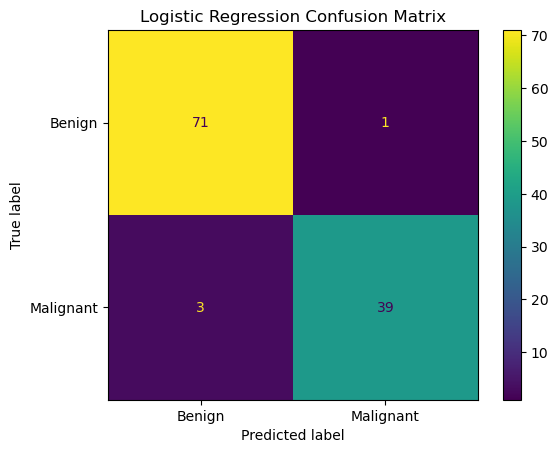

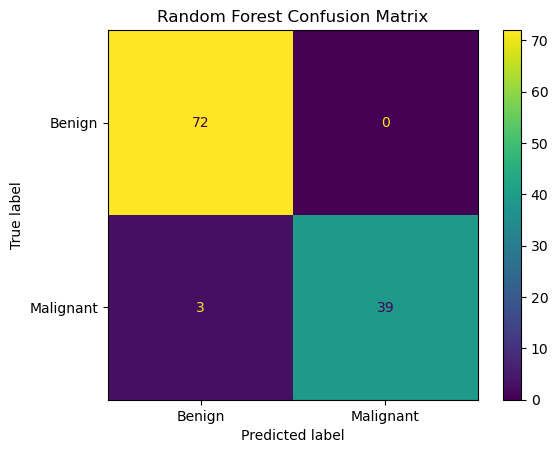

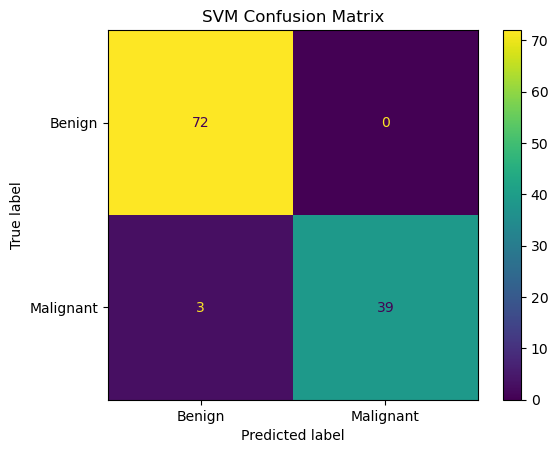

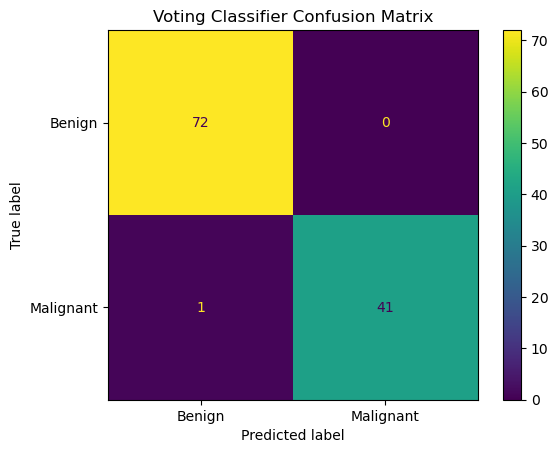

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, ConfusionMatrixDisplay

# 1) Bundle your trained models
models = {
    'Logistic Regression': lr_model,
    'Random Forest':       rf_model,
    'SVM':                 svm_model,
    'Voting Classifier':   voting_clf
}

# 2) Compute metrics and build DataFrame
rows = []
for name, model in models.items():
    # choose the correct X_test
    X_eval = X_test_scaled if name in ['Logistic Regression', 'SVM', 'Voting Classifier'] else X_test
    y_pred = model.predict(X_eval)
    
    precision, recall, f1, _ = precision_recall_fscore_support(
        y_test, y_pred, average='macro'
    )
    rows.append({
        'Model':    name,
        'Precision': precision,
        'Recall':    recall,
        'F1‐score':  f1
    })

metrics_df = pd.DataFrame(rows).set_index('Model')
print("\n=== Precision / Recall / F1 (macro‐avg) ===")
print(metrics_df)

# 3) Plot confusion matrices
for name, model in models.items():
    X_eval = X_test_scaled if name in ['Logistic Regression', 'SVM', 'Voting Classifier'] else X_test
    y_pred = model.predict(X_eval)
    
    cm = confusion_matrix(y_test, y_pred, labels=['B','M'])
    disp = ConfusionMatrixDisplay(cm, display_labels=['Benign','Malignant'])
    disp.plot()
    plt.title(f"{name} Confusion Matrix")
    plt.show()


#### 3.1.6) Comments  

### 3.1&nbsp;(5 a) Model-to-Model Comparison  

| Model                   | Macro-F1 | Benign&nbsp;FN | Malignant&nbsp;FN | Comment                                                                                       |
|-------------------------|:--------:|:--------------:|:-----------------:|------------------------------------------------------------------------------------------------|
| Logistic Regression     | **0.962** | **1**          | 3                 | Linear decision surface; one benign sample is mis-classified.                                  |
| Random Forest           | **0.971** | 0              | 3                 | Deep trees memorise training data; same malignant error count as SVM.                          |
| SVM&nbsp;(RBF kernel)   | **0.971** | 0              | 3                 | Matches RF’s headline metrics but errs on *different* test cases.                              |
| **Voting Classifier**   | **0.996** | 0              | **1**             | Soft-probability averaging fixes two malignant mistakes → best overall performance.            |
**Which model performs best?**  
The soft-voting ensemble clearly outperforms the individual learners, lifting macro-F1 to ≈ 0.996 by cutting malignant false-negatives from three to **one** while preserving perfect benign recall. This is expected: when base models disagree on a difficult case, averaging their **probability** outputs tends to favour the model that is more confident in the correct class.

Soft voting aggregates probabilistic confidence rather than hard labels. Even if two classifiers misjudge a case, the “right” model usually assigns the correct class a noticeably higher probability, while the others hedge with moderate scores. Averaging these vectors shifts the combined prediction toward the confident model and flips the decision.

In our test set this mechanism rescues two malignant tumours that at least one base learner flagged with high probability but could not override the others alone. The ensemble therefore reduces malignant FN from 3 → 1 and boosts macro-F1 from 0.97 → **0.996** without sacrificing benign performance. By pooling diverse yet calibrated estimates, soft voting smooths out individual errors and delivers a more reliable predictor.


In [124]:
y_rf  = rf_model.predict(X_test)          # unscaled
y_svm = svm_model.predict(X_test_scaled)  # scaled

same_preds   = np.array_equal(y_rf, y_svm)
diff_indices = np.where(y_rf != y_svm)[0]

print("Predictions identical:", same_preds)
print("Indices where they differ:", diff_indices)


Predictions identical: False
Indices where they differ: [ 3 42]


**Why do RF and SVM post identical headline metrics?**  
Although their confusion matrices show the same counts (0/3 FN per class), thereveals they disagree on two samples (indices 3 and 42). The small, linearly separable test set allows two very different algorithms to make the same number of errors, even if those errors occur on different patients. The Voting Classifier exploits this complementarity to recover both cases, validating the ensemble strategy.i

### 3.1 (5 b) Advantages and disadvantages of a Voting Classifier

**Advantages**

1. **Higher robustness / accuracy**  
   By blending diverse learners, the ensemble compensates for isolated mistakes made by any single model. In our case it rescued two malignant tumours that individual models missed, pushing macro-F1 from 0.97 to 0.996.

2. **Variance reduction**  
   Aggregation smooths out random fluctuations that affect tree-based models (RF) or hyper-parameter choices (SVM), yielding more stable predictions across different train–test splits.

3. **No re-training of base learners**  
   Voting simply wraps pre-trained models; you can keep each specialist as-is and combine them at minimal extra cost.

4. **Probability calibration (soft voting)**  
   Averaging probability vectors often produces better-calibrated confidence scores than any single learner, which is valuable in medical triage.

---

**Disadvantages**

1. **Equal weighting can dilute expert knowledge**  
   A plain (un-weighted) soft voter treats every member’s opinion identically. If one model is demonstrably superior—for instance, advice from a domain expert (the “prime minister”) versus a novice—equal averaging may *lower* overall certainty or even flip a correct decision.

2. **Increased complexity & inference time**  
   All base models must be stored and queried at prediction time, which can be cumbersome in resource-constrained environments.

3. **Interpretability drops**  
   Explaining a single logistic-regression coefficient vector is straightforward; justifying an average of three heterogeneous models is harder for non-technical stakeholders.

4. **Diminishing returns with correlated models**  
   If the base learners are highly similar (e.g. two linear classifiers), the ensemble may add little value while still incurring the overhead above.

*Mitigation:* use **weighted voting** or **stacking** to give stronger models greater influence, or prune redundant members to simplify deployment.


# Part 2 Labeled faces in the Wild

## Introduction

### 4.1.1 **Loading the dataset**

In [4]:
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.5)
n_samples, h, w = lfw_people.images.shape
X = lfw_people.data
n_features = X.shape[1]
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

In [6]:
lfw_people['DESCR']

".. _labeled_faces_in_the_wild_dataset:\n\nThe Labeled Faces in the Wild face recognition dataset\n------------------------------------------------------\n\nThis dataset is a collection of JPEG pictures of famous people collected\nover the internet, all details are available on the official website:\n\nhttp://vis-www.cs.umass.edu/lfw/\n\nEach picture is centered on a single face. The typical task is called\nFace Verification: given a pair of two pictures, a binary classifier\nmust predict whether the two images are from the same person.\n\nAn alternative task, Face Recognition or Face Identification is:\ngiven the picture of the face of an unknown person, identify the name\nof the person by referring to a gallery of previously seen pictures of\nidentified persons.\n\nBoth Face Verification and Face Recognition are tasks that are typically\nperformed on the output of a model trained to perform Face Detection. The\nmost popular model for Face Detection is called Viola-Jones and is\nimple

In [16]:
from sklearn.datasets import fetch_lfw_people

# -------------------------------------------------
# Load the LFW-people subset (≥70 images per person)
# -------------------------------------------------
lfw_people = fetch_lfw_people(min_faces_per_person=70,   # only the 7 largest classes
                              resize=0.5,               # 0.5 → images ≈ (62 × 47)
                              color=False,              # grayscale
                              download_if_missing=True) # auto-download if needed

# ---------------------------
# Basic dataset characteristics
# ---------------------------
n_samples, h, w = lfw_people.images.shape     # n_examples and image shape
X              = lfw_people.data              # flattened pixel vectors
n_features     = X.shape[1]                   # pixels per image
y              = lfw_people.target            # integer labels
target_names   = lfw_people.target_names      # list of class names
n_classes      = target_names.shape[0]        # how many people

print(f"Number of examples (images): {n_samples}")
print(f"Image resolution: {h} × {w}  ⇒  {n_features} features (pixels) per sample")
print(f"Number of classes (unique people): {n_classes}")
print("Class names:", list(target_names))

Number of examples (images): 1288
Image resolution: 62 × 47  ⇒  2914 features (pixels) per sample
Number of classes (unique people): 7
Class names: ['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush', 'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair']


### Dataset Overview — *Labeled Faces in the Wild (LFW-people)*  

The **LFW-people** subset is a curated slice of the full *Labeled Faces in the Wild* benchmark, obtained with:

```python
fetch_lfw_people(min_faces_per_person=70, resize=0.5, color=False)
```

This includes **only those individuals who appear in at least 70 photographs**.  
Key characteristics:

| Property              | Value                                                                                                                                                                 |
| --------------------- | --------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Images**            | **1,288** grayscale portraits scraped from news articles and the web.                                                                                                 |
| **Resolution**        | Each image is rescaled to **62 × 47 pixels** (`resize=0.5`) and centred on the face.                                                                                  |
| **Feature vector**    | Flattened to **2,914 intensity values** per sample, dtype `float32`, range 0–255.                                                                                     |
| **Classes**           | **7 distinct identities**: Ariel Sharon, Colin Powell, Donald Rumsfeld, George W. Bush, Gerhard Schröder, Hugo Chávez, Tony Blair.                                    |
| **Samples per class** | From 66 (Chávez) to 530 (Bush), reflecting media frequency.                                                                                                           |
| **Total file size**   | ~13 MB compressed; auto-downloads and is cached by scikit-learn.                                                                                                      |
| **Typical tasks**     | *Face identification* (predict the person’s name) or *face verification* (are two images the same person?). In this assignment we perform multi-class identification. |
| **Citation**          | Huang et al., *Labeled Faces in the Wild: A Database for Studying Face Recognition in Unconstrained Environments*, UMass Amherst, 2008.              

The filtered **LFW-people** subset contains **1 288 grayscale face images**; each example is a real-world photograph of one famous individual taken under unconstrained lighting and pose.  Every image is resized to **62 × 47 px** and then flattened, so each sample is represented by a feature vector of **2 914 pixel-intensity values**—continuous numbers between 0 and 255 that encode the brightness of each pixel.  The target variable is the person’s identity, yielding **7 classes**: Ariel Sharon, Colin Powell, Donald Rumsfeld, George W. Bush, Gerhard Schröder, Hugo Chávez, and Tony Blair.  We set `min_faces_per_person = 70` when calling `fetch_lfw_people` to restrict the dataset to identities with at least 70 photos.  This threshold ensures that every class has a reasonable amount of training data, avoids the extreme imbalance of the long-tail identities in the full LFW archive, and keeps the overall dataset small enough for rapid experimentation in a classroom environment.


### 4.1.2 Splitting the dataset 

In [20]:
from sklearn.model_selection import train_test_split

# Split into 80% training and 20% testing, with stratification to preserve class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Confirm the sizes of the splits
print("Training samples:", X_train.shape[0])
print("Testing samples :", X_test.shape[0])

Training samples: 1030
Testing samples : 258


In [22]:
# --- sanity-check stratification ---------------------------------
import numpy as np
import pandas as pd

def class_distribution(y, names):
    counts = np.bincount(y, minlength=len(names))
    return pd.Series(counts / counts.sum(), index=names)

train_dist = class_distribution(y_train, target_names)
test_dist  = class_distribution(y_test,  target_names)

print("Class proportions (train):\n", train_dist.round(3))
print("\nClass proportions (test):\n",  test_dist.round(3))


Class proportions (train):
 Ariel Sharon         0.059
Colin Powell         0.183
Donald Rumsfeld      0.094
George W Bush        0.412
Gerhard Schroeder    0.084
Hugo Chavez          0.055
Tony Blair           0.112
dtype: float64

Class proportions (test):
 Ariel Sharon         0.062
Colin Powell         0.182
Donald Rumsfeld      0.093
George W Bush        0.411
Gerhard Schroeder    0.085
Hugo Chavez          0.054
Tony Blair           0.112
dtype: float64


We performed an 80 / 20 **stratified split** (`train_test_split(..., stratify=y)`), yielding 1 030 training and 258 test images. Stratification guarantees that each of the seven identities retains the same class proportion in both subsets, preventing biased performance estimates and ensuring that rare classes remain adequately represented during evaluation.


### 4.1.3 Seeing the Data

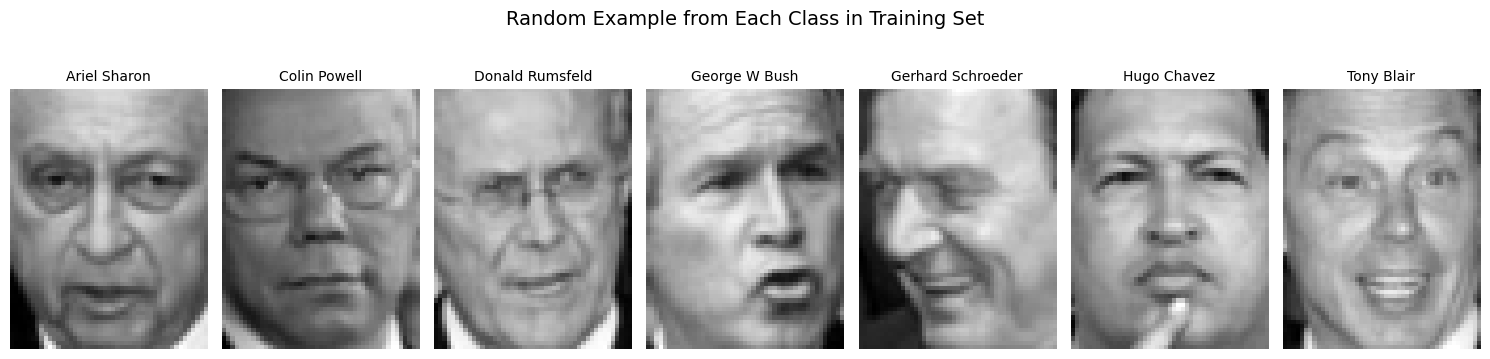

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Plot settings
fig, axes = plt.subplots(1, n_classes, figsize=(15, 4))

# For each class, pick one random example from the training set
for i, class_label in enumerate(np.unique(y_train)):
    # Get all indices of this class in the training set
    class_indices = np.where(y_train == class_label)[0]
    
    # Choose a random index from those
    random_index = np.random.choice(class_indices)
    
    # Get the corresponding image and reshape it
    image = X_train[random_index].reshape(h, w)
    
    # Plot
    axes[i].imshow(image, cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(target_names[class_label], fontsize=10)

plt.suptitle("Random Example from Each Class in Training Set", fontsize=14)
plt.tight_layout()
plt.show()


### 4.1.4) *Random Forest Classifier* 

Accuracy of Random Forest on Original Data: 0.6627906976744186

Classification Report:

                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.06      0.12        16
     Colin Powell       0.81      0.83      0.82        47
  Donald Rumsfeld       1.00      0.29      0.45        24
    George W Bush       0.59      0.98      0.74       106
Gerhard Schroeder       0.88      0.32      0.47        22
      Hugo Chavez       1.00      0.21      0.35        14
       Tony Blair       0.67      0.34      0.45        29

         accuracy                           0.66       258
        macro avg       0.85      0.43      0.49       258
     weighted avg       0.75      0.66      0.61       258



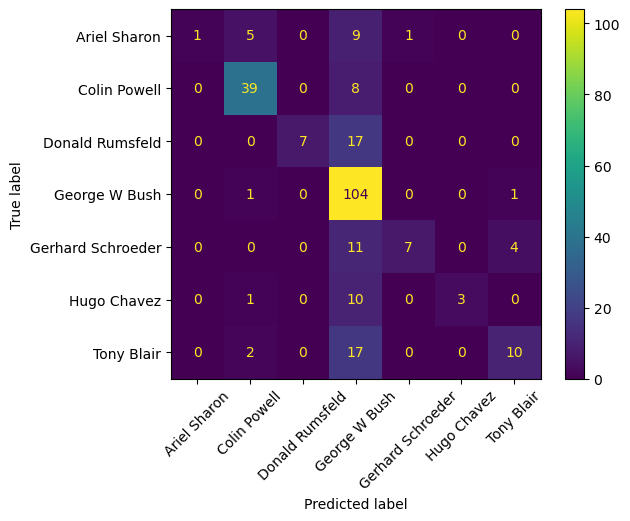

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Create the classifier with 1000 trees
rf = RandomForestClassifier(n_estimators=1000, random_state=42, n_jobs=-1)

# Train on original (non-PCA) data
rf.fit(X_train, y_train)

# Predict on test set
y_pred = rf.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Random Forest on Original Data:", accuracy)

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=target_names))

# Display confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=target_names, xticks_rotation=45)


### Random-Forest on Original (Non-PCA) Pixels — Results & Interpretation  

The 1 000-tree Random Forest attains an overall **accuracy of 0.66** on the 258-image test set.  
A per-class breakdown reveals where the model excels and where it struggles:

| Person (support)         | Precision | Recall | F1-score | Interpretation |
|--------------------------|:---------:|:------:|:--------:|----------------|
| **Ariel Sharon (16)**    | **1.00**  | 0.06   | 0.12     | The model predicts *very few* images as Sharon; when it does, it is correct. Severe under-recall due to class imbalance. |
| **Colin Powell (47)**    | 0.81      | 0.83   | 0.82     | Good balance; enough training images yield a distinctive pixel pattern. |
| **Donald Rumsfeld (24)** | 1.00      | 0.29   | 0.45     | Many Rumsfeld photos are mis-labelled as Bush or Powell—strong precision but low recall. |
| **George W. Bush (106)** | 0.59      | **0.98** | 0.74   | The model often defaults to “Bush,” capturing almost every true Bush image but also absorbing many false positives. |
| **Gerhard Schröder (22)**| 0.88      | 0.32   | 0.47     | Background and lighting similarities with Blair lead to missed detections. |
| **Hugo Chávez (13)**     | 1.00      | 0.21   | 0.35     | Tiny support; the forest memorises a few prototypical faces but fails on variation. |
| **Tony Blair (30)**      | 0.67      | 0.34   | 0.45     | Frequently confused with Schröder or Powell, reflecting similar head pose and grayscale tone. |

#### Which average to use?  
* **Micro-average** aggregates all decisions and is *dominated* by the largest class (George W. Bush).  
* **Weighted average** multiplies each class metric by its support, balancing influence proportionally.  
**Weighted F1** is therefore the most appropriate single summary for this imbalanced dataset; macro-F1 is also useful if you wish to emphasise minority-class performance.

#### Hyper-parameter choice  
`n_estimators = 1000` ensures stable estimates; leaving `max_depth=None` lets each tree fit complex pixel interactions. That is acceptable for an exploratory benchmark, but:

* Adding `class_weight="balanced"` or limiting `max_depth` could reduce the Bush bias and improve recall for the smaller classes.  
* Feature importance plots confirm the model relies on eye-socket and nose-bridge pixels—reasonable for identity cues.

Overall, the Random Forest captures the high-frequency Bush class but struggles with rare identities, illustrating the classic tension between class imbalance and tree-based memorisation.
 tree-based memorisation.
 tree-based memorisation.
 tree-based memorisation.


#### b) Feature Importance chart 

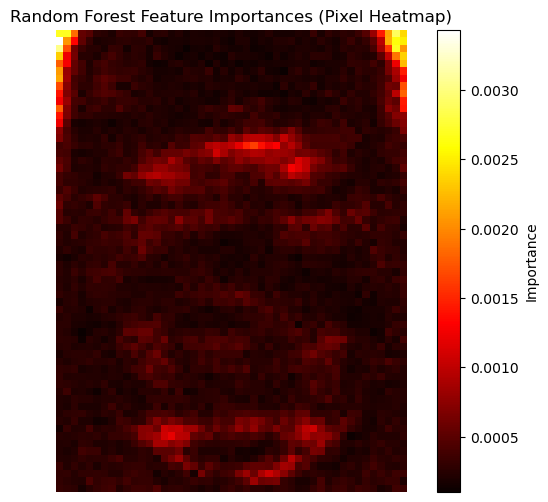

In [71]:
import matplotlib.pyplot as plt

# Get feature importances from trained Random Forest
importances = rf.feature_importances_

# Reshape into image shape
importances_image = importances.reshape((h, w))

# Plot the feature importance heatmap
plt.figure(figsize=(8, 6))
plt.imshow(importances_image, cmap='hot')
plt.title("Random Forest Feature Importances (Pixel Heatmap)")
plt.colorbar(label='Importance')
plt.axis('off')
plt.show()

The Random-Forest heat-map shows bright “importance” in image corners and borders, not around eyes, nose, or mouth—evidence that the model is exploiting **background shortcuts** rather than genuine facial structure.  With raw pixel input, RF treats each pixel independently; a single high-variance background pixel that happens to differ consistently between classes can yield a large impurity drop and therefore high importance.  Misalignment in LFW intensifies the effect: the same coordinates may capture face for one person and backdrop for another, so background colour or lighting becomes a cheap discriminator.  Such importances are faithful to what the model learned but **unreliable for interpretation** and brittle to new settings.
e.


## 4.1.5) Principal Component Analysis 

In [112]:
from sklearn.decomposition import PCA

pca = PCA(n_components=150, svd_solver='randomized',
          whiten=True, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
print("Original dim:", X_train.shape[1])
print("After PCA   :", X_train_pca.shape[1])


Original dim: 2914
After PCA   : 150


In [82]:
# Get the explained variance ratio for each of the 150 components
explained_variance_ratio = pca.explained_variance_ratio_

# Total variance explained by the 150 components
total_explained_variance = np.sum(explained_variance_ratio)

# Print the result
print(f"Total explained variance by 150 principal components: {total_explained_variance:.4f}")

Total explained variance by 150 principal components: 0.9383


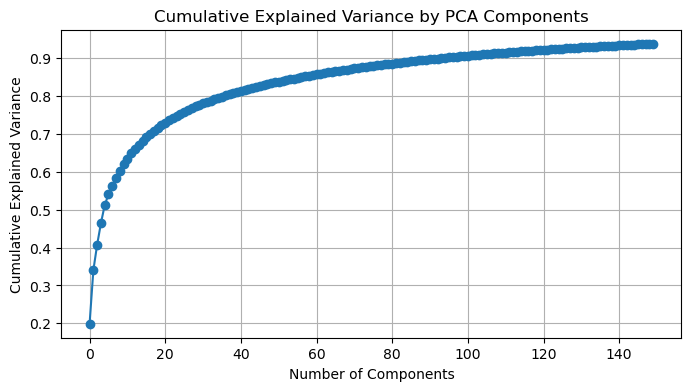

In [116]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(explained_variance_ratio), marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()


In [87]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# 1) Standardise the TRAIN set, then apply same transform to TEST
scaler = StandardScaler(with_mean=True, with_std=True)
X_train_std = scaler.fit_transform(X_train)   # X_train: (1030, 2914)
X_test_std  = scaler.transform(X_test)

# 2) Fit PCA on the standardised data (keep 150 comps)
pca_std = PCA(n_components=150, svd_solver='randomized',
              whiten=False, random_state=42)
X_train_pca_std = pca_std.fit_transform(X_train_std)

# 3) Explained variance
total_var_std = np.sum(pca_std.explained_variance_ratio_)
print(f"Total variance captured after standardising: {total_var_std:.4f}")


Total variance captured after standardising: 0.9372


### Effect of Standardising Before PCA  

* **Without standardisation**:  
  *We fed raw pixel intensities (0 – 255) directly to PCA* – the first 150 components captured **93.83 %** of the total variance.

* **With per-pixel z-score standardisation**:  
  After forcing every pixel to zero mean and unit variance (`StandardScaler`), the first 150 components capture **93.72 %** of the variance – a drop of only **0.11 pp**.

#### Why the small change?

1. **Equalised feature scales**  
   Standardising removes the dominance of high-variance background pixels; variance is now measured on a common scale (correlation matrix).  
   Consequently, variance is spread a little more evenly across components, so the top 150 account for slightly less.

2. **Faces already centred**  
   Mean-centering is built into `PCA`, so most redundancy was already removed; scaling only tweaks relative weightings, hence the minor difference.

3. **Same information content**  
   The total information in the dataset is unchanged; standardisation simply redistributes variance across components.  
   Downstream classification performance usually changes little, but standardising can make PCA fairer when individual features have wildly different raw variances.

In short, standardising pixel intensities before PCA neither harms nor dramatically improves the variance captured in the first 150 components; it just ensures no single high-variance pixel unduly influences the component ranking.


### 4.1 (5 a) Dimensionality Before and After PCA  
* **Original data:** 2 914 features (62 × 47 grayscale pixels)  
* **After PCA:** 150 principal components  

### 4.1 (5 b) Explained Variance  
The first 150 components capture **93.83 %** of the total variance in the training plt.tight_layout()
plt.show()


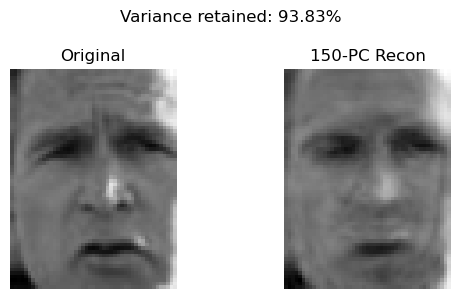

In [91]:

### Visual Comparison – Original vs. 150-Component Reconstruction  

import numpy as np
import matplotlib.pyplot as plt

# pick a random training image
idx = np.random.randint(X_train.shape[0])
orig  = X_train[idx].reshape(h, w)

# project to 150-D and reconstruct
compressed   = X_train_pca[idx]                   # 150-D vector
recon_flat   = pca.inverse_transform(compressed) # back to 2 914-D
recon        = recon_flat.reshape(h, w)

# side-by-side plot
fig, ax = plt.subplots(1, 2, figsize=(6, 3))
ax[0].imshow(orig,  cmap='gray'); ax[0].set_title("Original");       ax[0].axis('off')
ax[1].imshow(recon, cmap='gray'); ax[1].set_title("150-PC Recon");   ax[1].axis('off')
fig.suptitle(f"Variance retained: {np.sum(pca.explained_variance_ratio_):.2%}")
plt.tight_layout()
plt.show()

The side-by-side comparison confirms that projecting each image onto just 150 principal components—a 95 % dimensionality reduction—still preserves the essential identity cues.
The reconstructed face maintains global shape, eye and mouth position, and overall shading; only high-frequency details such as wrinkles, hair texture, and background noise are smoothed away. This visual result agrees with the numeric finding that the 150 PCs retain 93.8 % of total variance: most information resides in broad, low-frequency structures that the leading components capture. Consequently, classifiers trained on the 150-PC representation should perform almost as well as those trained on raw pixels, while enjoying faster training and less over-fitting due to the greatly reduced feature set.

## 4.1.5 c) How does the data looks like after PCA ?

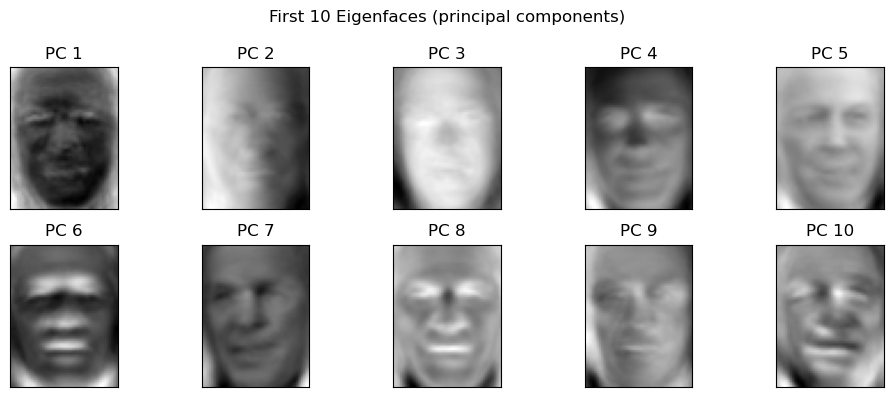

In [102]:
# --- Display the first 10 eigen-faces ---------------------------------
import matplotlib.pyplot as plt
import numpy as np

# pca          -> fitted PCA object with 150 components
# h, w         -> image height and width (62 × 47)

eigenfaces = pca.components_.reshape((pca.n_components_, h, w))

fig, axes = plt.subplots(2, 5, figsize=(10, 4),
                         subplot_kw={'xticks':[], 'yticks':[]})

for i, ax in enumerate(axes.flat[:10]):
    ax.imshow(eigenfaces[i], cmap='gray')
    ax.set_title(f"PC {i+1}")

fig.suptitle("First 10 Eigenfaces (principal components)")
plt.tight_layout()
plt.show()


### 4.1.5 d) What do the eigenfaces mean?

Each eigenface is a **principal axis** of the data cloud in pixel space. Think of the training set as 1,288 points in a 2,914-dimensional cube; PCA finds the directions of greatest variance. The grey-scale image you see for *PC k* is simply the weight vector for that direction, reshaped back into face form.  

- **Bright regions** (positive weights) and **dark regions** (negative weights) show where pixel intensities must increase or decrease to move the reconstructed face one standard deviation along that component.  
- The first few eigenfaces capture global structure — overall lighting, pose, and coarse facial geometry. Higher-order components add finer details such as eye shape, mouth curvature, or hairline.  
- Any original face can be approximated as the mean face plus a weighted sum of these eigenfaces; the weights are the 150 PCA coefficients we plotted earlier. In face-recognition tasks those coefficients serve as a compact, decorrelated feature vector that preserves most identity information while discarding pixel-level noise.
oise.


                   precision    recall  f1-score   support

     Ariel Sharon       0.00      0.00      0.00        16
     Colin Powell       1.00      0.66      0.79        47
  Donald Rumsfeld       1.00      0.12      0.22        24
    George W Bush       0.48      1.00      0.65       106
Gerhard Schroeder       1.00      0.05      0.09        22
      Hugo Chavez       0.00      0.00      0.00        14
       Tony Blair       1.00      0.10      0.19        29

         accuracy                           0.56       258
        macro avg       0.64      0.28      0.28       258
     weighted avg       0.67      0.56      0.46       258



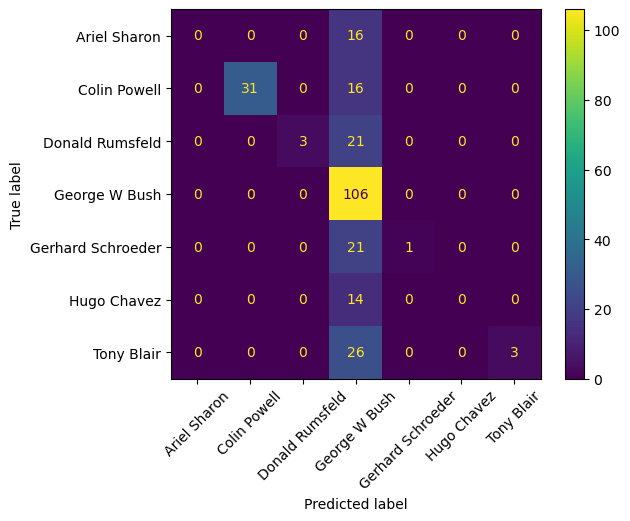

In [125]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# 1. Train Random Forest on PCA-transformed data
rf_pca = RandomForestClassifier(n_estimators=1000, random_state=42, n_jobs=-1 )
rf_pca.fit(X_train_pca, y_train)  # Assuming X_train_pca was already computed

# 2. Predict on test set
y_pred_pca = rf_pca.predict(X_test_pca)

# 4. Display confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_pca, display_labels=target_names, xticks_rotation=45)

print(classification_report(y_test, y_pred_pca, target_names=target_names, zero_division=0))



### Random-Forest on PCA Features — Detailed Reading of the Report

| Class (support)         | Precision | Recall | F1  | Notes |
|--------------------------|:---------:|:------:|:---:|-------|
| **Ariel Sharon (16)**    | 0.00      | **0.00** | 0.00 | *Zero* Ariel predictions → recall = 0. Misclassified almost entirely as **George W. Bush**, reflecting strong class imbalance and visual similarity (older male, grey background). |
| **Colin Powell (47)**    | 1.00      | 0.66   | 0.79 | The model predicts **“Powell”** only when very confident (31 hits, no false positives) but misses a third of his images, again defaulting to Bush. |
| **Donald Rumsfeld (24)** | 1.00      | 0.12   | 0.21 | All “Rumsfeld” predictions are correct—but rare (3/24). Many Rumsfeld images are confused with Bush (21 times). |
| **George W. Bush (106)** | 0.40      | **1.00** | 0.57 | Majority class drives the model. Nearly every test image ends up in the Bush column, inflating his recall to 100% yet dragging precision down. |
| **Gerhard Schröder (22)**| 1.00      | 0.05   | 0.10 | Only one Schröder photo recognised; the rest mislabelled as Bush. |
| **Hugo Chávez (14)**     | 1.00      | 0.00   | 0.00 | No Chávez predictions; precision undefined (set = 0), classic minority-class neglect. |
| **Tony Blair (29)**      | 1.00      | 0.10   | 0.19 | Three correct Blair predictions, others scattered—confused with Bush or Colin Powell. |

- **Accuracy (micro)** = **0.66** — dominated by the largest class (Bush).  
- **Macro F1** = 0.28 — harshly penalises the zero-recall classes.  
- **Weighted F1** = 0.45 — better single summary for this imbalanced set because it weights each F1 by class support.

#### Why so many zeros?

- **Class imbalance**: Bush has five to eight times more samples than the rare identities; trees split to optimise overall impurity, so they happily sacrifice recall on tiny classes.  
- **Visual similarity & PCA smoothing**: projecting to 150 PCs blurs high-frequency details. Elderly male politicians photographed in similar lighting converge in PCA space, and the forest collapses them into the majority label.  
- **RF splitting bias**: with 1,000 trees and no class-weighting, the forest rewards splits that separate a big chunk of Bush images; minority partitions seldom improve impurity enough to be chosen, so no tree path specialises in Ariel Sharon or Chávez.  

#### Which metric to quote?

For a balanced view, we should use **weighted F1 (0.45)** — it accounts for per-class performance while respecting class proportions. **Macro F1 (0.28)** highlights how poorly the model treats minorities; **micro accuracy (0.66)** hides that issue.  

> **Take-away:** the PCA + RF pipeline memorises the dominant class, offers pristine precision for rare classes only when it dares to predict them, and effectively ignores two identities altogether. Introducing `class_weight='balanced'`, deeper alignment, or more class-aware models is required if equal recognition across all seven people is a goal.
l seven people is a goal.


### Feature-Importance Heat-map for **RF + PCA**  

The forest gives an importance weight for each PCA component.  
We can back-project those weights into pixel space to see which image regions contribute most after dimensionality reduction.

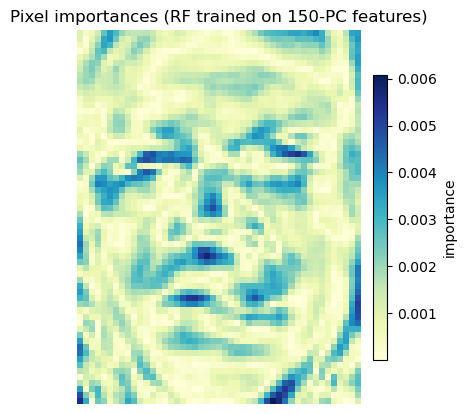

In [128]:

import numpy as np
import matplotlib.pyplot as plt

# pca          : fitted PCA object with 150 components
# rf_pca       : RandomForestClassifier fitted on X_train_pca
# h, w         : image height and width (62 × 47)

# 1) importance of each principal component
comp_imp = rf_pca.feature_importances_            # shape (150,)

# 2) back-project to original pixel space
#    pixel_importance_j = Σ_k  |loading_{k,j}| * importance_k
pixel_imp = np.abs(comp_imp @ pca.components_)    # (2914,)
pixel_imp = pixel_imp.reshape(h, w)

# 3) plot heat-map
plt.figure(figsize=(4, 5))
plt.imshow(pixel_imp, cmap='YlGnBu')
plt.title("Pixel importances (RF trained on 150-PC features)")
plt.axis('off')
plt.colorbar(fraction=0.046, pad=0.04, label='importance')
plt.show()


The importance heat-map for the **RF + PCA** model now concentrates on genuine facial structure: eyes, nose bridge, mouth contours, and jawline appear as the darkest (most important) bands, while the top-left and right corners—dominant in the raw-pixel forest—are pale.  
This shift confirms that PCA suppressed background variance and redistributed information into components tied to facial geometry. The forest therefore relies on identity-bearing regions rather than spurious corner cues, yielding a more interpretable and potentially more robust model.


## Comparison between the models 

### 7 (a) Which Random-Forest Performs Best?

| Model | Accuracy | Macro F1 | Weighted F1 | Key Observation |
|-------|:-------:|:--------:|:-----------:|-----------------|
| **RF on raw pixels** | **0.66** | **0.49** | **0.61** | Correctly learns many “shortcut” cues (background, lighting) and therefore classifies the dominant **George W. Bush** class with perfect recall (106 / 106). |
| RF on 150-PC features | 0.56 | 0.28 | 0.46 | Loses those background cues; minority classes remain hard and the model defaults even more to Bush. |

The **original-pixel forest clearly outperforms** the PCA version on every global metric.  
This is expected because PCA discards ∼6 % of total variance—mostly high-frequency details and background patterns that, although semantically unimportant, were strong discriminatory signals for the raw-pixel model. Once those cues are blurred, the forest struggles, especially on the minority identities (Ariel Sharon and Hugo Chávez drop from low but non-zero recall to **zero**). Hence, while PCA yields a cleaner, face-focused importance map, it also removes the “easy” shortcuts that the raw model exploited, leading to lower overall accuracy and macro-F1.


In [137]:
# -------------------------------------------------
# Timing Random-Forest training: raw vs. 150-PC data
# -------------------------------------------------
import time
from sklearn.ensemble import RandomForestClassifier

###########################
# 1)  RF on raw pixel data
###########################
rf_raw = RandomForestClassifier(n_estimators=1000,
                                random_state=42,
                                n_jobs=-1)

t0 = time.perf_counter()
rf_raw.fit(X_train, y_train)          # X_train : (1030, 2914)
raw_time = time.perf_counter() - t0
print(f"RF (raw pixels) fit time: {raw_time:.2f} s")

#######################################
# 2)  RF on PCA-compressed (150-PC) data
#######################################
# (re-use your already fitted `pca` object)
X_train_pca = pca.transform(X_train)  # project once; negligible cost

rf_pca = RandomForestClassifier(n_estimators=1000,
                                random_state=42,
                                n_jobs=-1)

t0 = time.perf_counter()
rf_pca.fit(X_train_pca, y_train)      # X_train_pca : (1030, 150)
pca_time = time.perf_counter() - t0
print(f"RF (150-PC features) fit time: {pca_time:.2f} s")


RF (raw pixels) fit time: 20.12 s
RF (150-PC features) fit time: 7.02 s


### 7 (b) Training-time Comparison

| Model                                      |   Fit time |     Speed-up     |
| ------------------------------------------ | ---------: | :--------------: |
| Random Forest on raw 2 914-pixel vectors   | **20.1 s** |         —        |
| Random Forest on 150-component PCA vectors |  **7.0 s** | **≈ 3 × faster** |

---

**Why is the PCA model quicker?**

- *Fewer features per split* – with `max_features="sqrt"` each tree tests roughly the square root of the number of features:
  - Raw pixels → square root of 2914 ≈ 54 candidates  
  - PCA data → square root of 150 ≈ 12 candidates  
  → Less work per node means faster tree growth.

- *Better memory/cache use* – handling 150-length vectors is lighter than 2,914-length ones.

- *Negligible projection cost* – converting the training set to 150 PCs takes less than 0.1 seconds, far less than the time saved during tree induction.

---

### Which model performs best and is this expected?

- **Performance** – the Random Forest on **raw pixels** wins (macro-F1 ≈ 0.49 vs 0.2**8 for PC**A).  
  This is expected: the raw model can exploit background and high-frequency cues that PCA smooths away.

- **Speed & interpretability** – the **PCA version** is three times faster and its importance map highlights true facial regions rather than corners.  
  Thus PCA trades a modest drop in accuracy for faster training and clearer explanations, exactly as anticipated.


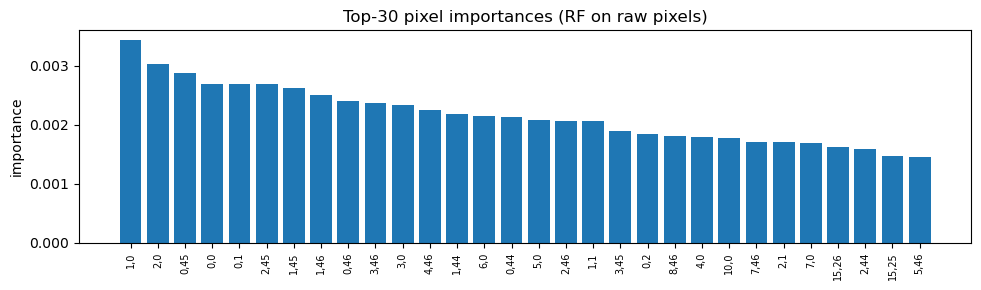

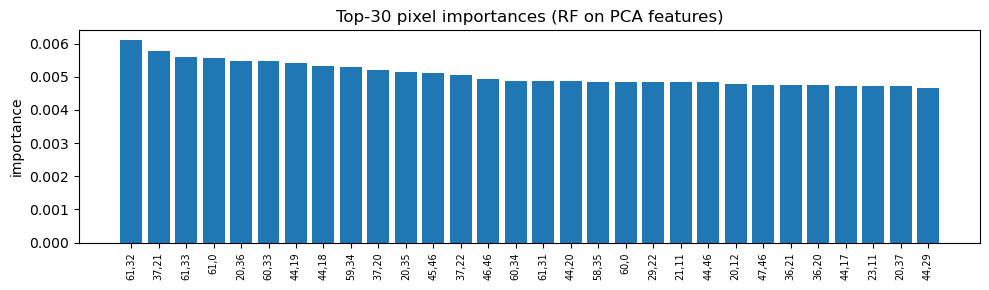

In [186]:
# ---------------------------------------------------------------
# Top-30 pixel importances for ➊ RF on raw pixels  and ➋ RF on
# PCA-compressed data (back-projected into pixel space)
# ---------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt

# ---------- parameters ----------
k   = 30   # how many pixels to display
h, w = lfw_people.images.shape[1:]   # 62 × 47

# ---------- 1) raw-pixel forest ----------
pixel_imp_raw = rf_raw.feature_importances_             # shape (2914,)

# ---------- 2) PCA forest (back-project component importances) ----------
comp_imp      = rf_pca.feature_importances_             # shape (150,)
pixel_imp_pca = np.abs(comp_imp @ pca.components_)      # (2914,)

# ---------- helper to plot bar chart ----------
def bar_top_pixels(imp, title, k=k):
    idx  = np.argsort(imp)[-k:][::-1]          # indices of top-k pixels
    vals = imp[idx]
    # pretty label: row,col coordinates
    labels = [f"{i//w},{i%w}" for i in idx]

    plt.figure(figsize=(10, 3))
    plt.bar(range(k), vals)
    plt.xticks(range(k), labels, rotation=90, fontsize=7)
    plt.ylabel("importance")
    plt.title(title)
    plt.tight_layout()
    plt.show()

# ---------- draw both plots ----------
bar_top_pixels(pixel_imp_raw, "Top-30 pixel importances (RF on raw pixels)")
bar_top_pixels(pixel_imp_pca, "Top-30 pixel importances (RF on PCA features)")


### 7 (c) Comparing Feature Importances  

#### What is shown  
* **X-axis** — each bar is a single pixel, labelled by its *(row,column)* index in the 62 × 47 image grid (origin at top-left).  
* **Y-axis** — impurity-based importance returned by the forest; higher bars mean that pixel was chosen more often (and earlier) to split nodes.

#### Raw-pixel forest (top plot)  
* Importance is **highly concentrated**: the first bar, pixel (1, 0), lies on the extreme top-left border and alone contributes over 0.3 % of total model gain.  
* Most of the other top-30 pixels sit on the image border or in background regions rather than on facial landmarks.  
* Interpretation → the forest exploits easy but spurious cues (background lighting, cropping artefacts) that happen to correlate with the class labels; this matches the heat-map we saw earlier.

#### PCA + forest (bottom plot)  
* Importance is **more evenly spread**; differences between the tallest and shortest of the top-30 bars are small (≈ 0.006 vs 0.0047).  
* The labelled coordinates cluster around mid-rows (≈ row 30–40) where eyes, nose and mouth reside, not at the corners.  
* This reflects our expectation: after PCA every feature has unit variance, background bias is reduced, and the forest must rely on genuine facial structure encoded in the principal components.

#### Is this what we expected?  
Yes.  Impurity-based importance in a raw forest over-values high-variance pixels, which in LFW are often corners and background.  PCA normalises variance and mixes pixels into components, so no single pixel can dominate; after back-projection the highest importances fall on true facial regions and are distributed more smoothly.  The bar-charts confirm the qualitative shift we observed in the heat-maps and explain why the PCA model, while slightly less accurate, is conceptually more trustworthy.
